In [ ]:
import plotnine as p9

In [63]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
from matplotlib.path import Path
from matplotlib.patches import PathPatch

np.random.seed(38)

# Data generation
dates = pd.date_range(start='2024-02-01', periods=100, freq='D')
initial_rate = 75
drift = 0.003
volatility = 0.1
returns = np.random.normal(drift, volatility, len(dates))
rates = initial_rate * np.cumprod(1 + returns)

x, y = dates, rates

timeserie = pd.DataFrame({'date': dates, 'rate': rates})

## Area plot

References:

- https://posit.co/blog/improving-the-layout-of-plotnine-graphics/
- https://f0nzie.github.io/rmarkdown-python-plotnine/scales-and-zooming.html
- https://jeroenjanssens.com/plotnine/

Special topics:

- Math-Tex in axis names/labels: https://github.com/has2k1/plotnine/issues/594
- Draw sub-plots: https://github.com/has2k1/plotnine/issues/46
- Mark transparent (time) periods / areas: https://github.com/has2k1/plotnine/issues/587
- Text colouring 1: https://github.com/tomicapretto/flexitext
- Text colouring 2: https://github.com/znstrider/highlight_text

In [117]:
transparency = 0.3
range_upper_lim = 8
length = 200
yintercept = np.arange(0, range_max, range_upper_lim/length)
alphas = np.arange(0, transparency, transparency/length)[::-1]

grades_df = pd.DataFrame({'yintercept': yintercept, 'alpha': alphas})

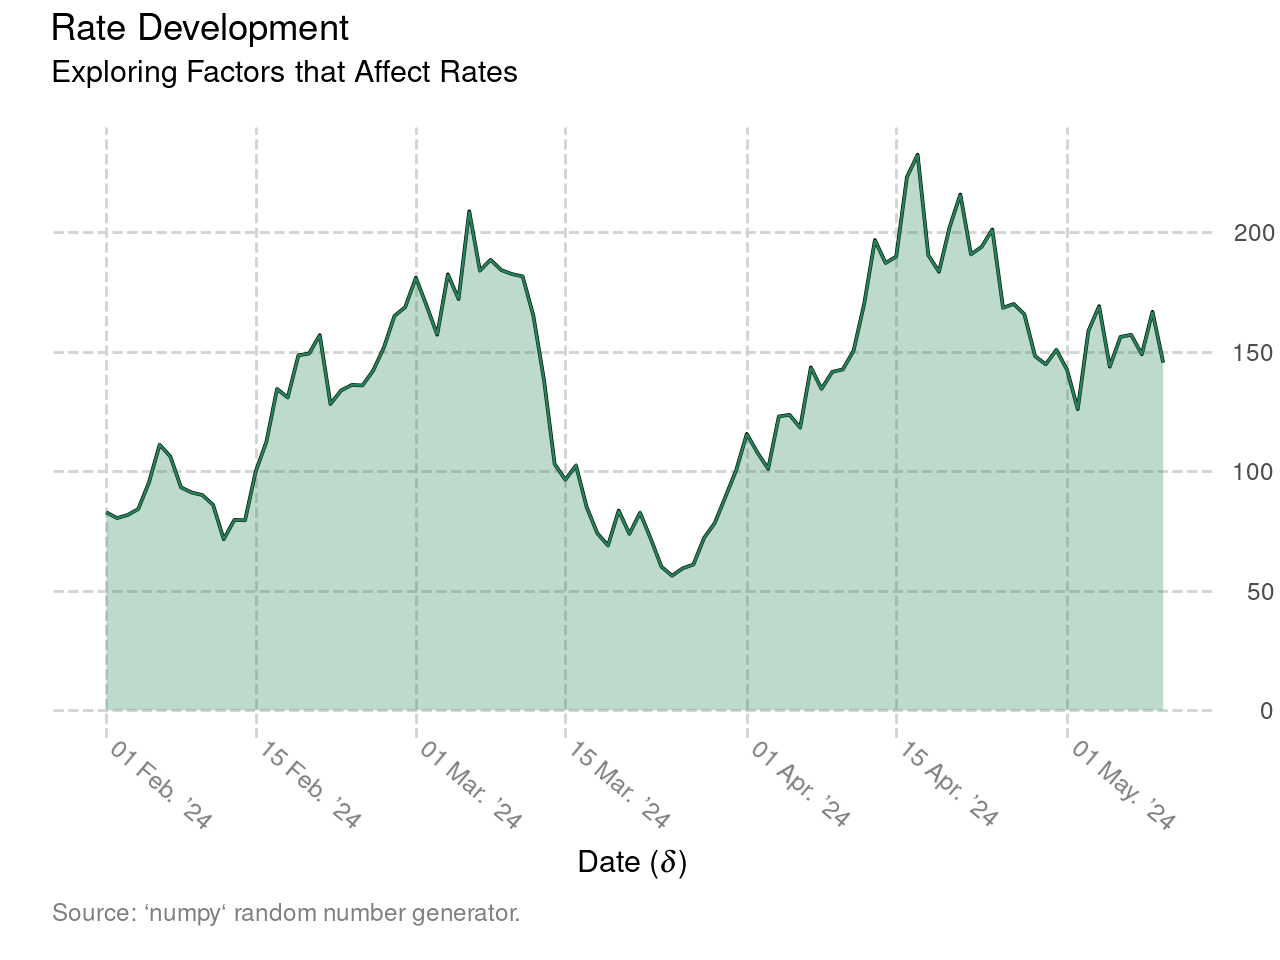

In [238]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

col_green = '#268358'
transparency = 0.3
yaxis_right_lab_space = 0.05

caption = """\
Source: `numpy` random number generator.
"""


theme_set(theme_minimal())

(
    p9.ggplot(timeserie, aes(x="date", y="rate"))
    + p9.geom_line(linetype = 'solid', size=.75)
    + p9.geom_area(fill=col_green, color=col_green, alpha=transparency) # fill_alpha("red", 0.5)
    # Date formatting:
    + p9.scale_x_date(date_labels="%d %b. '%y") # expand=(0, 0), 
    # + p9.scale_y_continuous(expand=(0, 0, 0.1, 0)) # expand is used to manage grid line "overhang"
    
    # + p9.geom_hline(aes(yintercept = 0), alpha = 0.2) 

    + p9.labs(
        x="Date ($\delta$)",
        y="",
        colour="grey",
        size="Gears",
        title="Rate Development",
        subtitle ="Exploring Factors that Affect Rates\n", # \textcolor{red}{Rates}
        caption=caption,
    )

    + p9.theme(
        plot_title=element_text(ha="left"),
        # left justify the caption and have one line of space between it and
        # the x-axis label
        plot_caption=element_text(ha="left", margin={"t": 1, "units": "lines"}, color='grey'),
        axis_text_x = element_text(color="grey", size=9, angle=320, va = 'top', ha = 'left', ),  # position=(0, -0.01)),                                    
        plot_margin_bottom = 0.01,
        # y-axis-labels on the right side:
        axis_text_y=element_text(position=(1 + yaxis_right_lab_space, 0)),
        # Trick to make right y-axis labels visible:
        plot_margin_right = yaxis_right_lab_space,
        # Grid lines:
        panel_grid_major=element_line(colour="#d3d3d3", linetype='--'),  # dashed
        panel_grid_minor=element_blank(),        
    )    


)


# Development

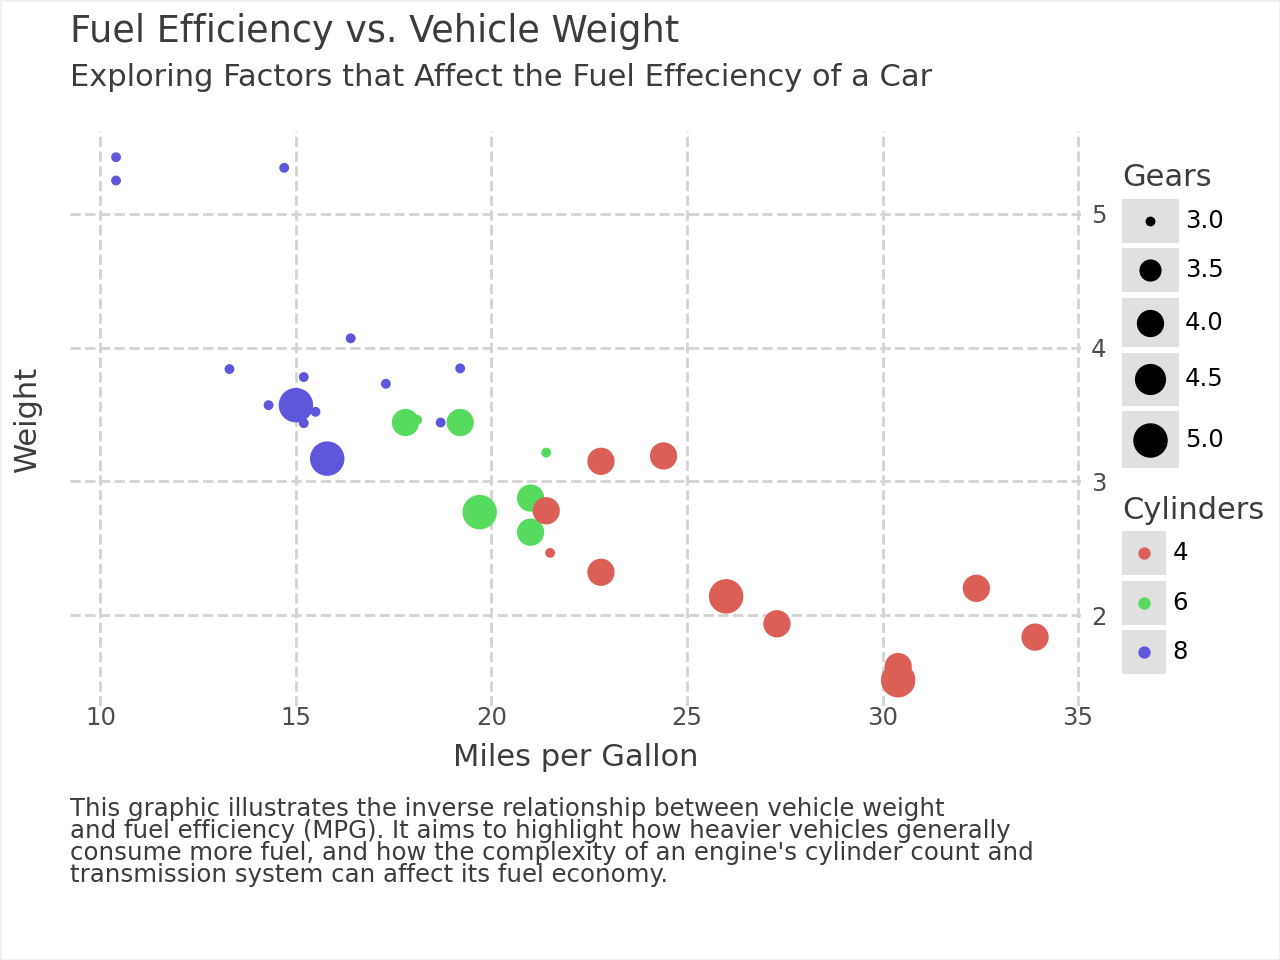

In [61]:
from plotnine import ggplot, aes, labs, geom_point, theme, theme_538, theme_set
import plotnine as p9
from plotnine.data import mtcars

# theme_set(theme_538())
# theme_set(theme_minimal())


# Gallery, labels

caption = """\
This graphic illustrates the inverse relationship between vehicle weight
and fuel efficiency (MPG). It aims to highlight how heavier vehicles generally
consume more fuel, and how the complexity of an engine's cylinder count and
transmission system can affect its fuel economy.
"""

from plotnine import *
(
    ggplot(mtcars, aes("mpg", "wt", colour="factor(cyl)", size="gear"))
    + geom_point()
    + labs(
        x="Miles per Gallon",
        y="Weight",
        colour="Cylinders",
        size="Gears",
        title="Fuel Efficiency vs. Vehicle Weight",
        subtitle ="Exploring Factors that Affect the Fuel Effeciency of a Car\n",
        caption=caption,
    )

    + theme(
        # left justify the caption and have one line of space between it and
        # the x-axis label
        plot_caption=element_text(ha="left", margin={"t": 1, "units": "lines"}),
        panel_grid_major=element_line(colour="#d3d3d3", linetype='--'),  # dashed
        panel_grid_minor=element_blank(),
        # y-axis-labels on the right side:
        axis_text_y=element_text(position=(1.025, 0)),
        # background colours:
        panel_background=element_rect(fill = 'white', colour = ''), # element_blank(),
        plot_background = element_rect(fill = 'white', colour = ''),
    )
    # + p9.scale_y_continuous(position='right')
    
    
)
